# importing

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(style="darkgrid")

In [2]:
global_temp_df = pd.read_csv('data/GlobalTemperatures.csv')

# exploring global temp

In [3]:
global_temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
global_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [5]:
global_temp_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [6]:
global_temp_df.isnull().any()

dt                                           False
LandAverageTemperature                        True
LandAverageTemperatureUncertainty             True
LandMaxTemperature                            True
LandMaxTemperatureUncertainty                 True
LandMinTemperature                            True
LandMinTemperatureUncertainty                 True
LandAndOceanAverageTemperature                True
LandAndOceanAverageTemperatureUncertainty     True
dtype: bool

In [7]:
global_temp_df.isnull().mean()

dt                                           0.000000
LandAverageTemperature                       0.003759
LandAverageTemperatureUncertainty            0.003759
LandMaxTemperature                           0.375940
LandMaxTemperatureUncertainty                0.375940
LandMinTemperature                           0.375940
LandMinTemperatureUncertainty                0.375940
LandAndOceanAverageTemperature               0.375940
LandAndOceanAverageTemperatureUncertainty    0.375940
dtype: float64

In [8]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
global_temp_df['year'] = global_temp_df['dt'].apply(lambda x: x.year)

In [10]:
global_temp_df.isnull().mean()

dt                                           0.000000
LandAverageTemperature                       0.003759
LandAverageTemperatureUncertainty            0.003759
LandMaxTemperature                           0.375940
LandMaxTemperatureUncertainty                0.375940
LandMinTemperature                           0.375940
LandMinTemperatureUncertainty                0.375940
LandAndOceanAverageTemperature               0.375940
LandAndOceanAverageTemperatureUncertainty    0.375940
year                                         0.000000
dtype: float64

In [11]:
global_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
 9   year               

In [12]:
global_temp_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,3192.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1882.500000
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587,76.799074
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,1750.000000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000,1816.000000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000,1882.500000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000,1949.000000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,2015.000000


### missing data

In [13]:
missing_value_cols = [x for x in global_temp_df.columns if global_temp_df[x].isnull().any()]

In [14]:
missing_value_cols

['LandAverageTemperature',
 'LandAverageTemperatureUncertainty',
 'LandMaxTemperature',
 'LandMaxTemperatureUncertainty',
 'LandMinTemperature',
 'LandMinTemperatureUncertainty',
 'LandAndOceanAverageTemperature',
 'LandAndOceanAverageTemperatureUncertainty']

In [15]:
for i in range(0, len(missing_value_cols)):
    col = missing_value_cols[i]
    print('' + str(col))
    global_temp_df[col] = global_temp_df[col].fillna(global_temp_df.groupby('year')[col].transform('mean'))

LandAverageTemperature
LandAverageTemperatureUncertainty
LandMaxTemperature
LandMaxTemperatureUncertainty
LandMinTemperature
LandMinTemperatureUncertainty
LandAndOceanAverageTemperature
LandAndOceanAverageTemperatureUncertainty


In [16]:
global_temp_df.isnull().mean()

dt                                           0.00000
LandAverageTemperature                       0.00000
LandAverageTemperatureUncertainty            0.00000
LandMaxTemperature                           0.37594
LandMaxTemperatureUncertainty                0.37594
LandMinTemperature                           0.37594
LandMinTemperatureUncertainty                0.37594
LandAndOceanAverageTemperature               0.37594
LandAndOceanAverageTemperatureUncertainty    0.37594
year                                         0.00000
dtype: float64

In [17]:
global_temp_df.dropna(inplace=True, axis=0)

In [18]:
global_temp_df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062,2015


In [19]:
global_temp_df = global_temp_df.iloc[:, [0,-1, -2, -3]]

In [20]:
global_temp_df.set_index('year', inplace=True)

### visualizing data

In [21]:
global_temp_df.describe()

,LandAndOceanAverageTemperatureUncertainty,LandAndOceanAverageTemperature
count,1992.000000,1992.000000
mean,0.128532,15.212566
std,0.073587,1.274093
min,0.042000,12.475000
25%,0.063000,14.047000
50%,0.122000,15.251000
75%,0.151000,16.396250
max,0.457000,17.611000


In [22]:
global_temp_df['LandAndOceanAverageTemperature_plus_uncertainty'] = global_temp_df['LandAndOceanAverageTemperature'] + global_temp_df['LandAndOceanAverageTemperatureUncertainty']

In [23]:
global_temp_df['LandAndOceanAverageTemperature_minus_uncertainty'] = global_temp_df['LandAndOceanAverageTemperature'] - global_temp_df['LandAndOceanAverageTemperatureUncertainty']

In [24]:
data = global_temp_df.drop(['LandAndOceanAverageTemperatureUncertainty', 'dt'], axis=1)

data.columns = ['Global Temperature', 'Global Temperature + Uncertainty', 'Global Temperature - Uncertainty']


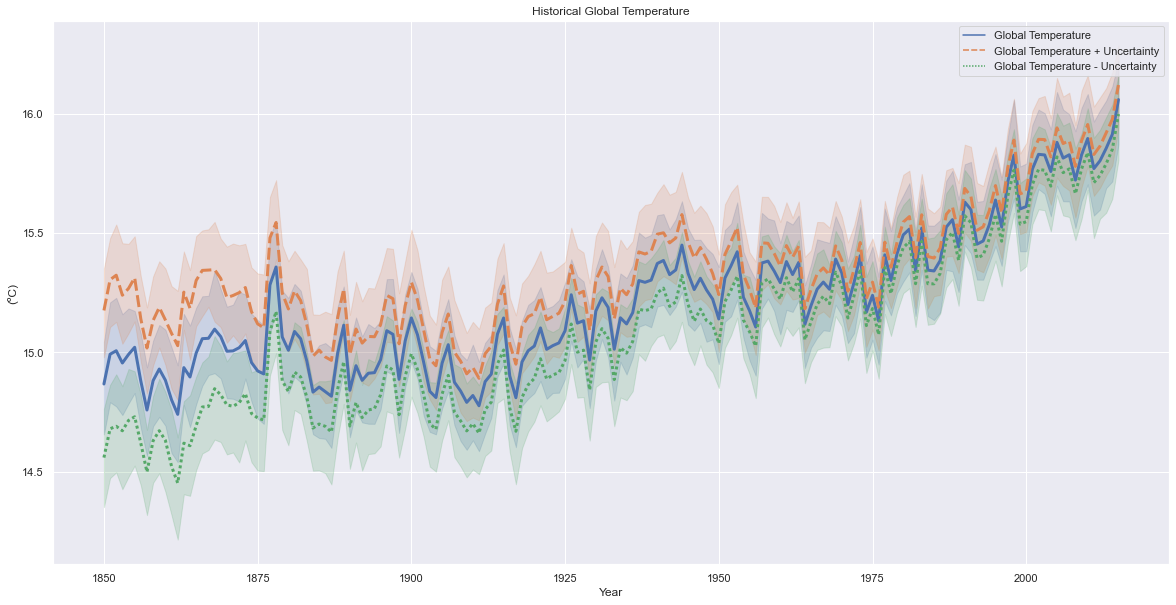

In [25]:
plt.subplots(figsize=(20,10))

plt.title('Historical Global Temperature')

ax = sns.lineplot(data=data,ci=40, lw=3)

ax.set(xlabel='Year', ylabel='(ºC)')

plt.savefig('global_temp.pdf')

plt.show()

### autocorr

In [26]:
shift_1 = global_temp_df['LandAndOceanAverageTemperature'].autocorr(lag=1)
print(shift_1)

0.8682728911434793


In [27]:
shift_2 = global_temp_df['LandAndOceanAverageTemperature'].autocorr(lag=2)
print(shift_2)

0.5217459635298022


In [28]:
shift_3 = global_temp_df['LandAndOceanAverageTemperature'].autocorr(lag=10)
print(shift_3)

0.5174450580531719


In [29]:
shift_3 = global_temp_df['LandAndOceanAverageTemperature'].autocorr(lag=12)
print(shift_3)

0.9881913324792486


In [30]:
global_temp_df['LandAndOceanAverageTemperature'].autocorr()

0.8682728911434793

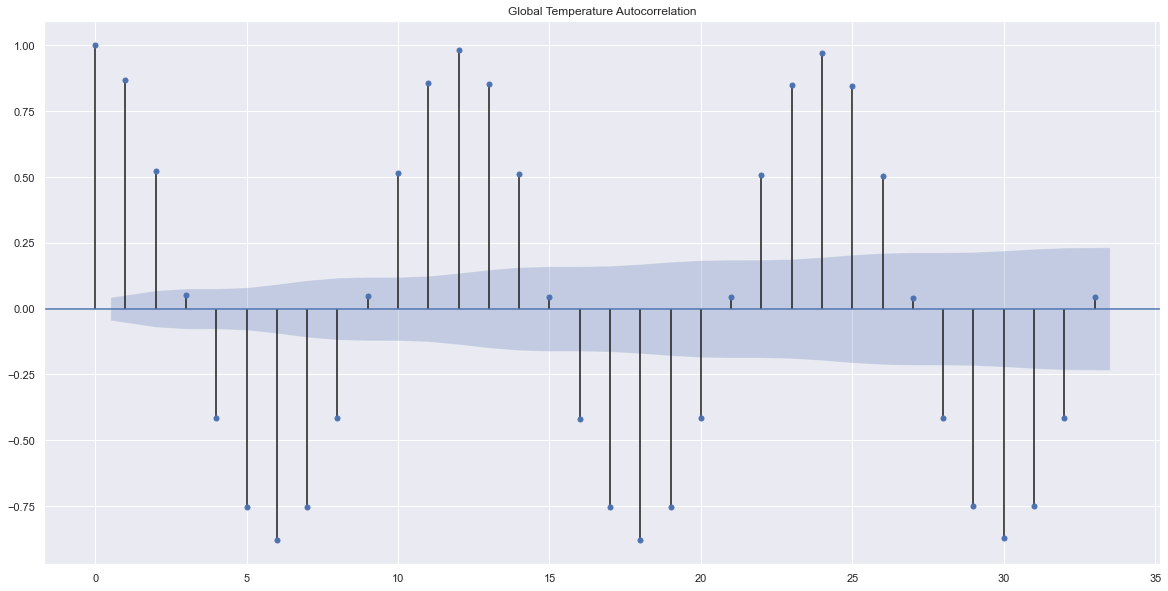

In [31]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plot_acf(global_temp_df['LandAndOceanAverageTemperature'], ax, title='Global Temperature Autocorrelation')

plt.savefig('global_temp_auto_corr.pdf')

plt.show()

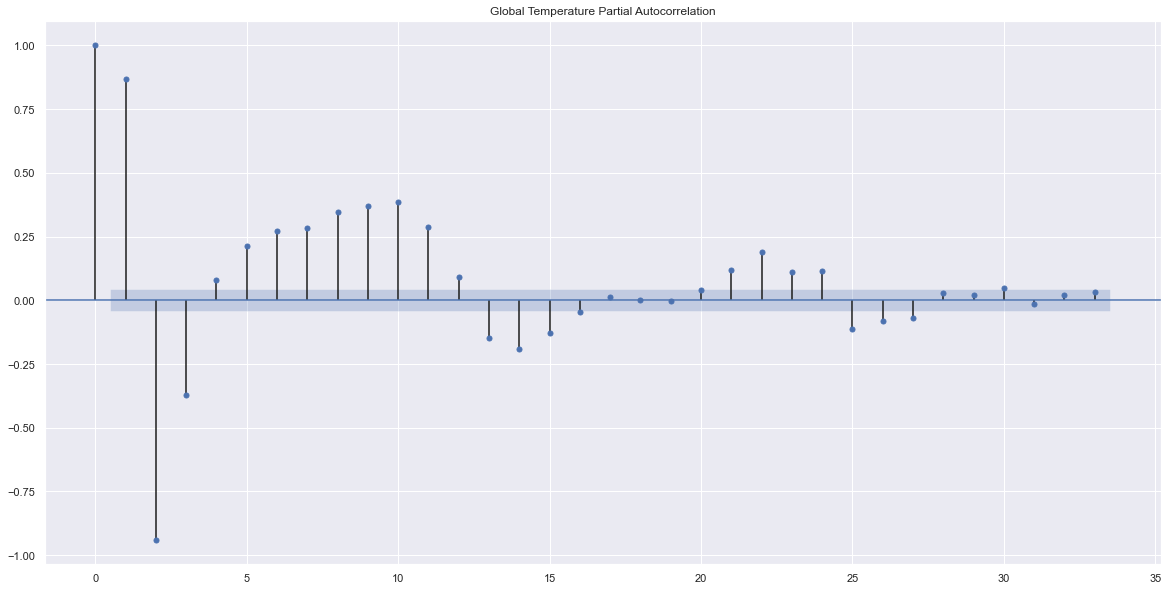

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plot_pacf(global_temp_df['LandAndOceanAverageTemperature'], ax, title='Global Temperature Partial Autocorrelation')

plt.savefig('global_temp_auto_corr.pdf')

plt.show()

## decomposing time series

In [33]:
global_temp_df.set_index('dt', inplace=True)

In [34]:
s_decomp = seasonal_decompose(global_temp_df['LandAndOceanAverageTemperature'], model='additive', period=12)

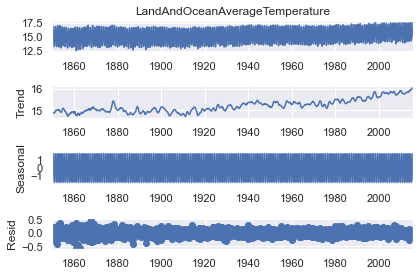

In [35]:
s_decomp.plot()
plt.show()




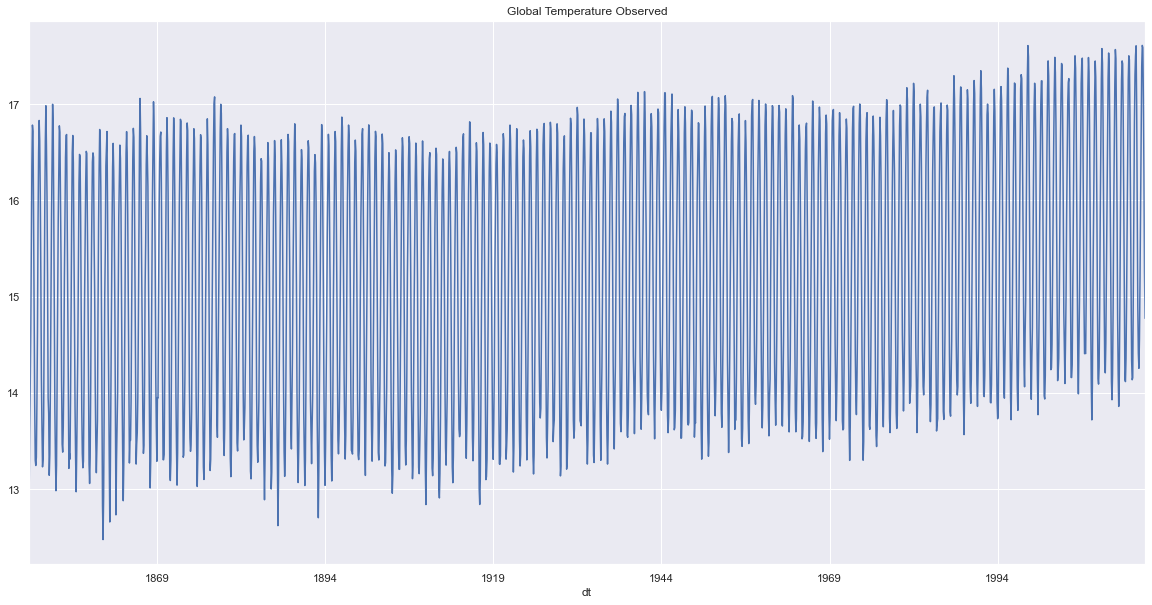

In [36]:
plt.subplots(figsize=(20,10))
plt.title('Global Temperature Observed')
s_decomp.observed.plot()

plt.savefig('global_temp_decomposition_observed.pdf')



plt.show()

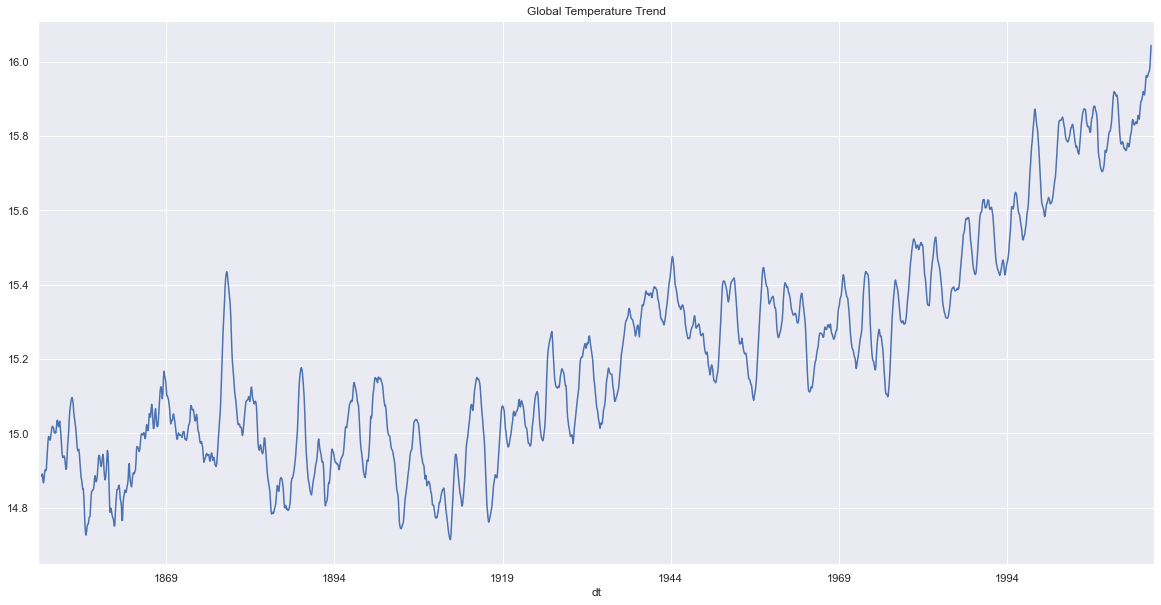

In [37]:
plt.subplots(figsize=(20,10))
plt.title('Global Temperature Trend')

plt.savefig('global_temp_decomposition_trend.pdf')


s_decomp.trend.plot()
plt.show()

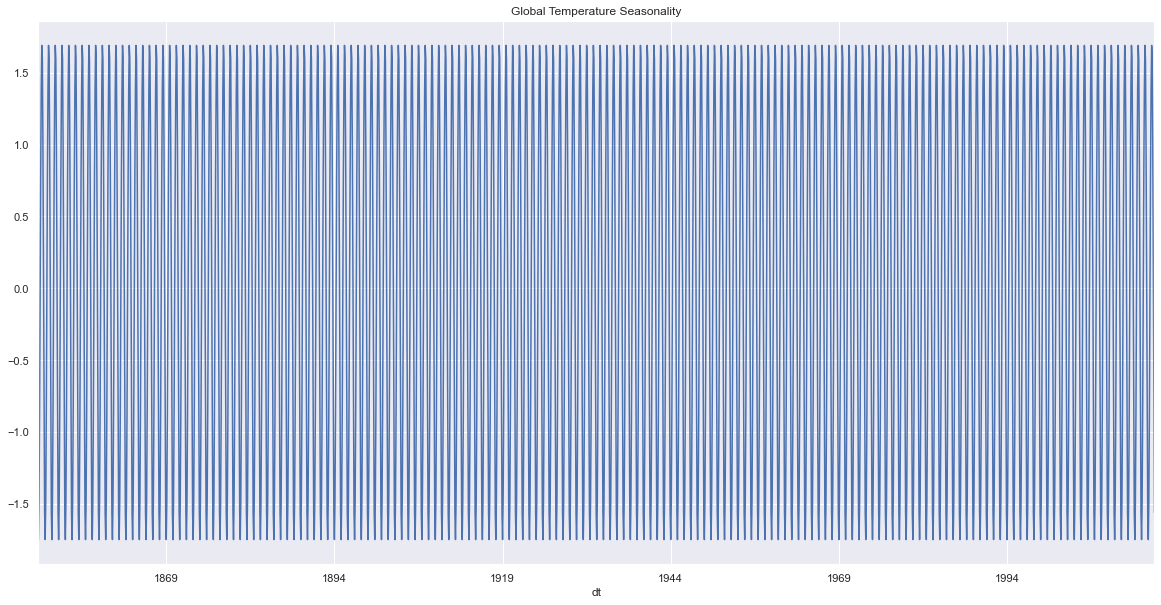

In [38]:
plt.subplots(figsize=(20,10))
plt.title('Global Temperature Seasonality')

plt.savefig('global_temp_decomposition_season.pdf')

s_decomp.seasonal.plot()

plt.show()

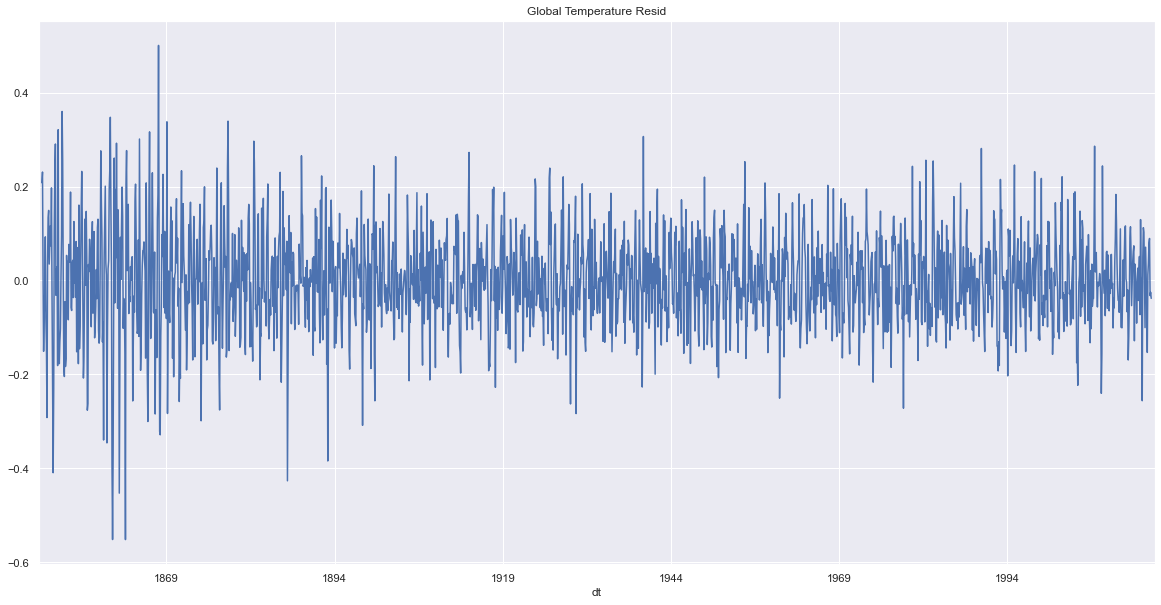

In [39]:
plt.subplots(figsize=(20,10))
plt.title('Global Temperature Resid')

plt.savefig('global_temp_decomposition_resid.pdf')

s_decomp.resid.plot()

plt.show()

In [40]:
trend = s_decomp.trend
seasonal = s_decomp.seasonal 
residual = s_decomp.resid  

## seasonality

## trend

## stationary

In [43]:
global_temp_df = global_temp_df.loc[:, ['LandAndOceanAverageTemperature']]

In [53]:
global_temp_df.to_csv('data/global_temp_df.csv', index=True)

In [46]:
global_temp_df

,LandAndOceanAverageTemperature
dt,
1850-01-01,12.833
1850-02-01,13.588
1850-03-01,14.043
1850-04-01,14.667
1850-05-01,15.507
...,...
2015-08-01,17.589
2015-09-01,17.049
2015-10-01,16.290


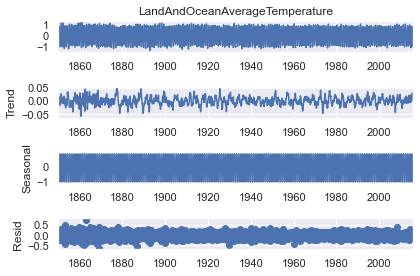

In [47]:
s_decomp = seasonal_decompose(global_temp_df['LandAndOceanAverageTemperature'].diff(1).dropna(), model='additive', period=12)
s_decomp.plot()
plt.show()



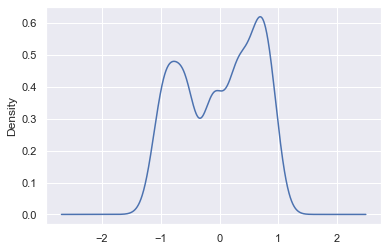

In [48]:
global_temp_df['LandAndOceanAverageTemperature'].diff(1).dropna().plot(kind='kde')

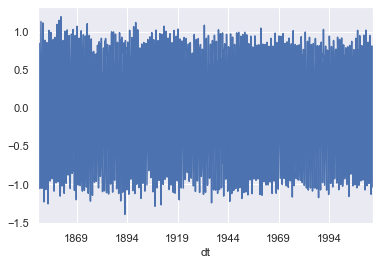

In [49]:
global_temp_df['LandAndOceanAverageTemperature'].diff(1).dropna().plot()

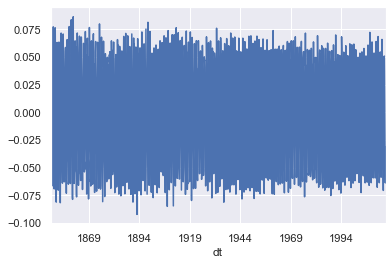

In [50]:
global_temp_df['LandAndOceanAverageTemperature'].pct_change().dropna().plot()

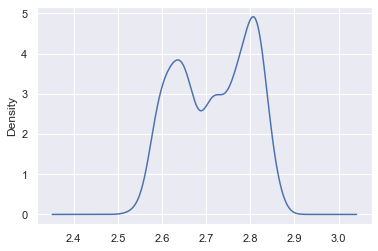

In [51]:
np.log(global_temp_df['LandAndOceanAverageTemperature']).plot(kind='kde')